In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [2]:
data = pd.read_csv(r'C:\Users\prathyusha\Downloads\HR-Analytics-and-Employee-Attrition-Prediction-master\HR-Analytics-and-Employee-Attrition-Prediction-master\Datasets\HR-Employee-Attrition.csv')

In [3]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


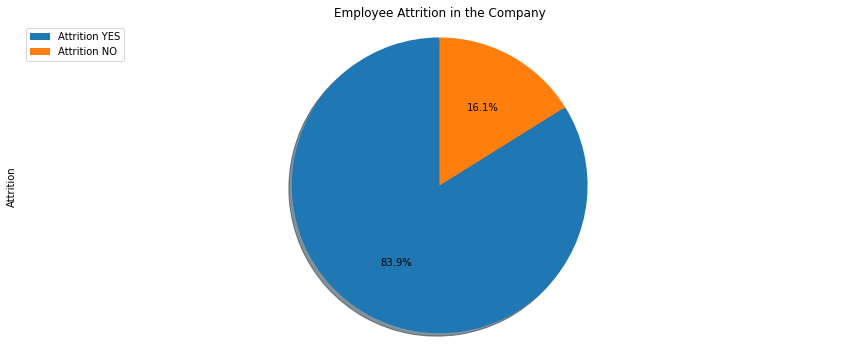

In [4]:
labels = 'Attrition YES','Attrition NO'
data['Attrition'].astype(str).value_counts().plot(kind ='pie',figsize=(15,6),autopct='%1.1f%%',startangle=90,shadow=True,labels=None,)
plt.title('Employee Attrition in the Company')
plt.axis('equal')
plt.legend(labels=labels,loc='upper left')
plt.show()

In [5]:
data = data.drop(columns=['StandardHours','EmployeeCount','Over18','EmployeeNumber','StockOptionLevel'])
data.head() # Dropping the useless columns

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,15,3,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,3,4,6,3,3,2,2,2,2


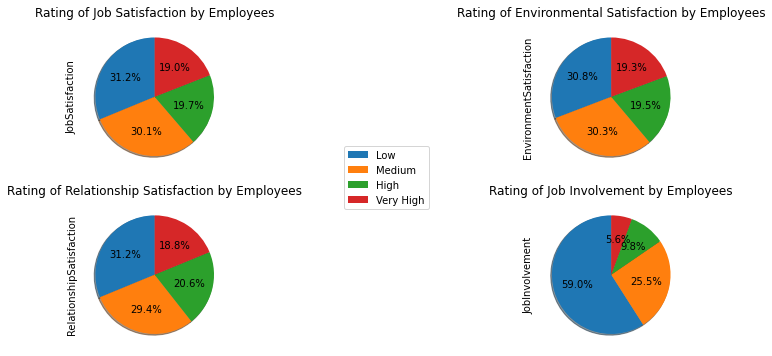

In [6]:
fig = plt.figure() 

ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222)  
ax3 = fig.add_subplot(223) 
ax4 = fig.add_subplot(224)  

labels = 'Low' ,'Medium','High','Very High'

data['JobSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax1) # add to subplot 2
ax1.set_title ('Rating of Job Satisfaction by Employees')
fig.legend(labels=labels,loc='center')

data['EnvironmentSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax2) 
ax2.set_title('Rating of Environmental Satisfaction by Employees')

data['RelationshipSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax3)
ax3.set_title('Rating of Relationship Satisfaction by Employees')

data['JobInvolvement'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax4) 
ax4.set_title('Rating of Job Involvement by Employees')

plt.show()

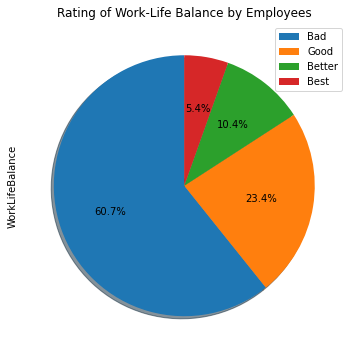

In [7]:
fig2 = plt.figure() 

ax5 = fig2.add_subplot(121) 
labels_list1 = 'Bad','Good','Better','Best' 
data['WorkLifeBalance'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax5) # add to subplot 2
ax5.set_title ('Rating of Work-Life Balance by Employees')
ax5.legend(labels=labels_list1,loc='upper right')

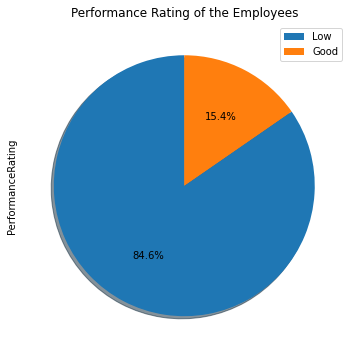

In [8]:
fig2 = plt.figure() 
ax6 = fig2.add_subplot(122)  
labels_list2 = 'Low','Good','Excellent','Outstanding'
data['PerformanceRating'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax6) 
ax6.set_title('Performance Rating of the Employees')
ax6.legend(labels=labels_list2,loc='upper right')



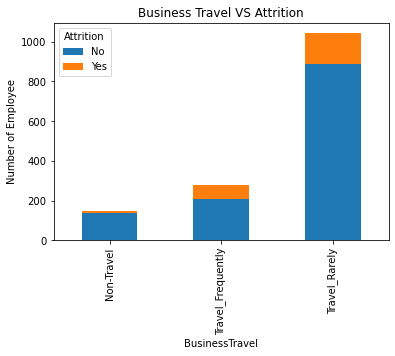

In [9]:
props = data.groupby("BusinessTravel")['Attrition'].value_counts(normalize=False).unstack()

props.plot(kind='bar', alpha=1, stacked='False')

plt.title('Business Travel VS Attrition')
plt.ylabel('Number of Employee')
plt.show()

In [ ]:
pd.crosstab(attrdata['Gender '],attrdata['Stay/Left']).plot(kind="bar",figsize=(10,6))

In [10]:
we = data[['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TotalWorkingYears', 'Attrition']]
we.head()

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,Attrition
0,6,4,0,5,8,Yes
1,10,7,1,7,10,No
2,0,0,0,0,7,Yes
3,8,7,3,0,8,No
4,2,2,2,2,6,No


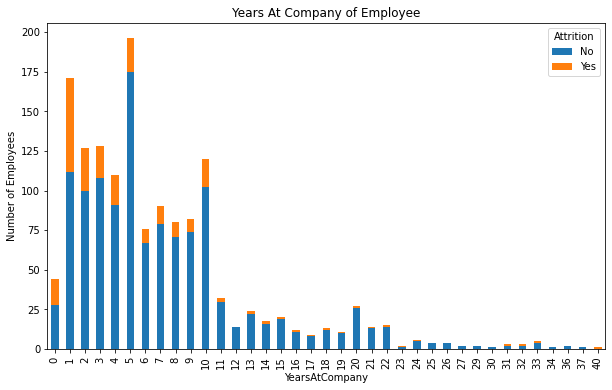

In [11]:
yac = data.groupby("YearsAtCompany")['Attrition'].value_counts(normalize=False).unstack()

yac.plot(kind='bar', stacked='False',figsize=(10,6))

plt.title('Years At Company of Employee')
plt.ylabel('Number of Employees')
plt.show()


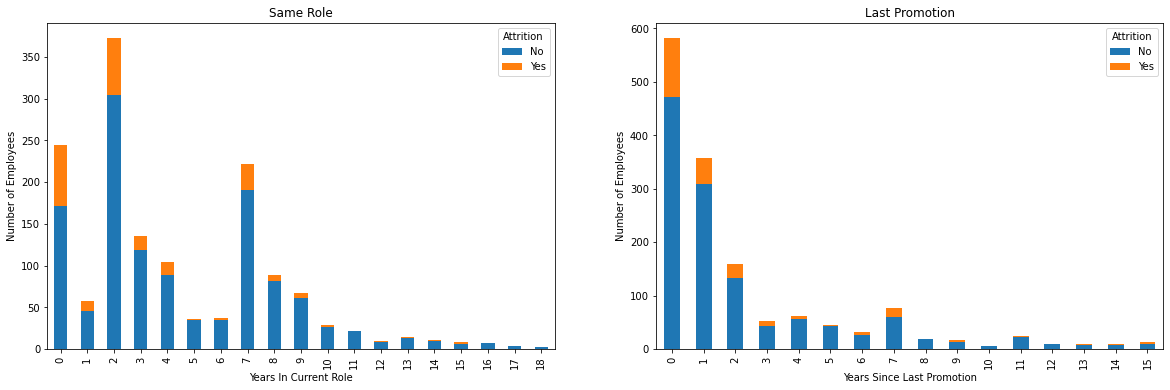

In [12]:
ycr = data.groupby("YearsInCurrentRole")['Attrition'].value_counts(normalize=False).unstack()
ysp = data.groupby("YearsSinceLastPromotion")['Attrition'].value_counts(normalize=False).unstack()


fig = plt.figure() # create figure

ax0 = fig.add_subplot(121) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(122) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
ycr.plot(kind='bar', stacked='False',figsize=(20,6), ax=ax0) # add to subplot 1
ax0.set_title('Same Role')
ax0.set_xlabel('Years In Current Role')
ax0.set_ylabel('Number of Employees')

# Subplot 2: Line plot
ysp.plot(kind='bar', stacked='False',figsize=(20,6), ax=ax1) # add to subplot 2
ax1.set_title ('Last Promotion')
ax1.set_ylabel('Number of Employees')
ax1.set_xlabel('Years Since Last Promotion')

plt.show()

In [13]:
mi = data[data['Attrition']=='Yes']['MonthlyIncome']
mi = mi.reset_index()
mi.drop(['index'], axis=1, inplace=True)


mn = data[data['Attrition']=='No']['MonthlyIncome']
mn = mn.reset_index()
mn.drop(['index'], axis=1, inplace=True)

mi['mn'] = mn
mi.rename(columns={'MonthlyIncome':'Yes', 'mn':'No'}, inplace=True)
mi.head()


,Yes,No
0,5993,5130
1,2090,2909
2,2028,3468
3,3407,3068
4,2960,2670


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

C:\Users\prathyusha\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


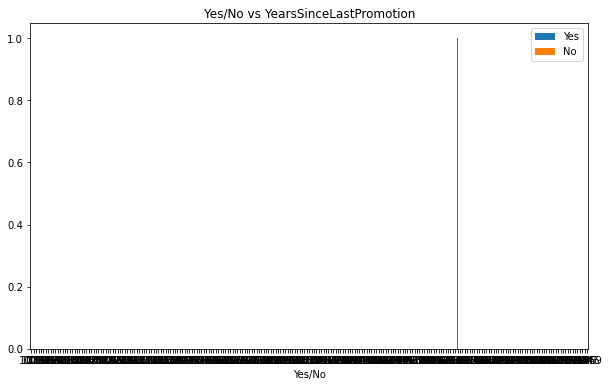

In [14]:
pd.crosstab(mi['Yes'],mi['No']).plot(kind="bar",figsize=(10,6))
plt.title("Yes/No vs YearsSinceLastPromotion")
plt.xlabel("Yes/No")
plt.legend(["Yes","No"])
plt.xticks(rotation=0)

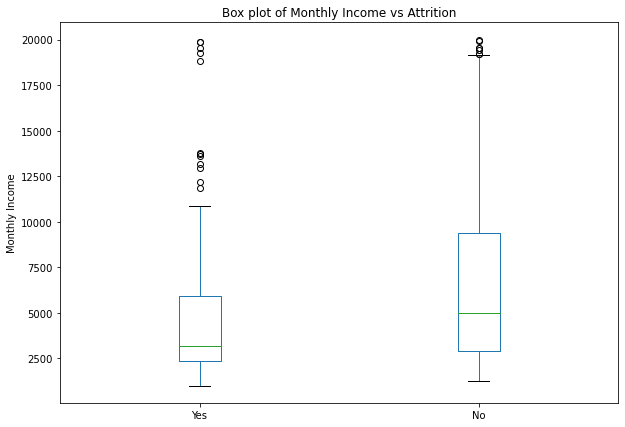

In [15]:
mi.plot(kind='box', figsize=(10, 7))

plt.title('Box plot of Monthly Income vs Attrition')
plt.ylabel('Monthly Income')

plt.show()

In [17]:
newAT= data[(data.Attrition=='No')]

In [18]:
newAT

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,4,10,3,3,10,7,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,3,4,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,...,13,3,3,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,...,20,4,1,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,17,3,3,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,15,3,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,20,4,2,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,14,3,4,17,3,2,9,6,0,8


In [19]:
newAT1= newAT[(newAT.MonthlyIncome<6503)]

In [20]:
newAT1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,4,10,3,3,10,7,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,3,4,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,...,13,3,3,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,...,20,4,1,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,4,Female,...,18,3,4,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,17,3,3,17,3,3,5,2,0,3
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,20,4,2,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,14,3,4,17,3,2,9,6,0,8


In [21]:
newAT2= newAT[(newAT.BusinessTravel=='Travel_Rarely')]

In [22]:
newAT2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,3,4,6,3,3,2,2,2,2
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,...,20,4,1,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,...,22,4,2,1,2,3,1,0,0,0
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,...,13,3,2,17,3,2,7,7,7,7
10,35,No,Travel_Rarely,809,Research & Development,16,3,Medical,1,Male,...,13,3,3,6,5,3,5,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,2,Female,...,11,3,1,21,2,2,20,9,9,6
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,4,Female,...,18,3,4,5,2,3,4,2,0,0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,15,3,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,20,4,2,6,0,3,6,2,0,3


In [ ]:
newAT3= newAT[(newAT.Department=='Research & Development')]

In [ ]:
newAT3

In [ ]:
data = pd.read_csv(r'C:\Users\prathyusha\Downloads\HR-Analytics-and-Employee-Attrition-Prediction-master\HR-Analytics-and-Employee-Attrition-Prediction-master\Datasets\HR-Employee-Attrition.csv')
data= data.drop(columns=['StandardHours','EmployeeCount','Over18','EmployeeNumber','StockOptionLevel'])

le = preprocessing.LabelEncoder()
categorial_variables = ['Attrition','BusinessTravel','Department','EducationField',
                        'Gender','JobRole','MaritalStatus','OverTime']
for i in categorial_variables:
    data[i] = le.fit_transform(data[i])
data.head(5)
data.to_csv('LabelEncoded_CleanData.csv')

In [ ]:
target = data['Attrition']
train = data.drop('Attrition',axis = 1)
train.shape

In [ ]:
train_accuracy = []
test_accuracy = []
models = ['Logistic Regression','SVM','KNN','Decision Tree','K Means Clustering']

In [ ]:
#Defining a function which will give us train and test accuracy for each classifier.
def train_test_error(y_train,y_test):
    train_error = ((y_train==Y_train).sum())/len(y_train)*100
    test_error = ((y_test==Y_test).sum())/len(Y_test)*100
    train_accuracy.append(train_error)
    test_accuracy.append(test_error)
    print('{}'.format(train_error) + " is the train accuracy")
    print('{}'.format(test_error) + " is the test accuracy")

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(train, target, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
train_predict = log_reg.predict(X_train)
test_predict = log_reg.predict(X_test)
y_prob = log_reg.predict(train)
y_pred = np.where(y_prob > 0.5, 1, 0)
train_test_error(train_predict , test_predict)

In [ ]:
from sklearn import svm
SVM = svm.SVC(probability=True)
SVM.fit(X_train,Y_train)
train_predict = SVM.predict(X_train)
test_predict = SVM.predict(X_test)
train_test_error(train_predict , test_predict)

In [ ]:
from sklearn import neighbors
n_neighbors = 15
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knn.fit(X_train,Y_train)
train_predict = knn.predict(X_train)
test_predict = knn.predict(X_test)
train_test_error(train_predict , test_predict)

In [ ]:
from sklearn import tree
dec = tree.DecisionTreeClassifier()
dec.fit(X_train,Y_train)
train_predict = dec.predict(X_train)
test_predict = dec.predict(X_test)
train_test_error(train_predict , test_predict)

In [ ]:
from sklearn.cluster import KMeans
kms = KMeans(n_clusters=2, random_state=1)
kms.fit(X_train,Y_train)
train_predict = kms.predict(X_train)
test_predict = kms.predict(X_test)
train_test_error(train_predict,test_predict)

In [ ]:
results = pd.DataFrame({"Test Accuracy" : test_accuracy , "Train Accuracy" : train_accuracy} , index = models)

In [ ]:
results

In [ ]:
import matplotlib.pyplot as plt
results.plot()
plt.show()

In [ ]:
from tkinter import *
from tkinter import ttk
from tkinter import messagebox
import pandas as pd
import numpy as np


business_travel=3
dept=3
edu_field=3
gender=3
job_role=3
martital=3
over_time=3
Monthly Income=

def get_entry_data():
    age = int(el1.get())

    if el2.get() == "Non Travel":
         business_travel=0
    elif el2.get() == "Travel Frequently":
        business_travel=1
    elif el2.get() == "Travel Rarely":
        business_travel=2

    daily_rate = int(el3.get())

    if el4.get() == "Human Resources":
         dept=0
    elif el4.get() == "Research & Development":
        dept=1
    elif el4.get() == "Sales":
        dept=2

    dist_home = int(el5.get())

    education = int(el6.get())

    if el7.get() == "Human Resources":
         edu_field=0
    elif el7.get() == "Life Sciences":
        edu_field=1
    elif el7.get() == "Marketing":
        edu_field=2
    elif el7.get() == "Medical":
    	edu_field=3
    elif el7.get() == "Other":
    	edu_field=4

    Environment_satification = int(el8.get())

    if el9.get() == "Female":
         gender=0
    elif el9.get() == "Male":
        gender=1    

    Hourly_rate = int(el10.get())

    job_invol = int(el11.get())

    job_level = int(el12.get())

    if el13.get() == "Health Care Representative":
         job_role=0
    elif el13.get() == "Human Resources":
        job_role=1
    elif el13.get() == "Laboratory Technician":
        job_role=2
    elif el13.get() == "Manager":
    	job_role=3
    elif el13.get() == "Manufacturing Director":
    	job_role=4
    elif el13.get() == "Research Director":
    	job_role=5
    elif el13.get() == "Research Scientist":
    	job_role=6
    elif el13.get() == "Sales Executive":
    	job_role=7

    job_satisifaction = int(el14.get())

    if el15.get() == "Single":
         martital=0
    elif el15.get() == "Divorced":
        martital=1
    elif el15.get() == "Married":
        martital=2

    monthly_income = int(el16.get())

    monthly_rate = int(el17.get())

    num_company = int(el18.get())

    if el19.get() == "No":
         over_time=0
    elif el19.get() == "Yes":
        over_time=1

    salary_hike = int(el20.get())

    performance_rate = int(el21.get())       

    relationship_satisfaction = int(el22.get())

    total_work_years = int(el23.get())

    training_time = int(el24.get())

    work_life_bal = int(el25.get())       

    year_at_company = int(el26.get())

    year_in_role = int(el27.get())

    last_promotion = int(el28.get())

    current_manager = int(el29.get())

    y_pred = []

    y_pred.append(age)
    y_pred.append(business_travel)
    y_pred.append(daily_rate)
    y_pred.append(dept)
    y_pred.append(dist_home)
    y_pred.append(education)
    y_pred.append(edu_field)
    y_pred.append(Environment_satification)
    y_pred.append(gender)
    y_pred.append(Hourly_rate)
    y_pred.append(job_invol)
    y_pred.append(job_level)
    y_pred.append(job_role)
    y_pred.append(job_satisifaction)
    y_pred.append(martital)
    y_pred.append(monthly_income)
    y_pred.append(monthly_rate)
    y_pred.append(num_company)
    y_pred.append(over_time)
    y_pred.append(salary_hike)
    y_pred.append(performance_rate)
    y_pred.append(relationship_satisfaction)
    y_pred.append(total_work_years)
    y_pred.append(training_time)
    y_pred.append(work_life_bal)
    y_pred.append(year_at_company)
    y_pred.append(year_in_role)
    y_pred.append(last_promotion)
    y_pred.append(current_manager)

    y_pred = np.reshape(y_pred,(1,-1))

    print(y_pred)

    from pandas import DataFrame
    import matplotlib.pyplot as plt
    import seaborn as sns

    from sklearn import preprocessing
    import math
    from sklearn.model_selection import train_test_split
    from sklearn import metrics 

    data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
    data = data.drop(columns=['StandardHours','EmployeeCount','Over18','EmployeeNumber','StockOptionLevel'])

    le = preprocessing.LabelEncoder()
    categorial_variables = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
    for i in categorial_variables:
        data[i] = le.fit_transform(data[i])
    data.head(5)
    data.to_csv('LabelEncoded_CleanData.csv')

    target = data['Attrition']
    train = data.drop('Attrition',axis = 1)

    #def train_test_error(y_train,y_test):
    #	test_error = ((y_test==Y_test).sum())/len(Y_test)*10
    #	test_accuracy = test_error

    X_train, X_test, Y_train, Y_test = train_test_split(train, target, test_size=0.33, random_state=42)
    
    from sklearn.linear_model import LogisticRegression
    log_reg = LogisticRegression()
    log_reg.fit(X_train,Y_train)
    test_predict = log_reg.predict(X_test)
    test_accuracy = log_reg.score(X_test,Y_test)
    #train_test_error(train_predict , test_predict)

    txt = log_reg.predict(y_pred)

    if txt == 0:
    	messagebox.showinfo("ATTRITION", "EMPLOYEE WILL STAY")
    else:
        messagebox.showinfo("ATTRITION", "CHANCE OF EMPLOYEE WILL LEAVE")

gui = Tk()

gui.title('HR ANALYSIS OF EMPLOYEE ATTRITION GUI')
gui.geometry('600x700')
gui.configure(background="light blue")

class TableDropDown(ttk.Combobox):
    def __init__(self, parent):
        self.current_table = tk.StringVar() # create variable for table
        ttk.Combobox.__init__(self, parent)#  init widget
        self.config(textvariable = self.current_table, state = "readonly", values = ["Customers", "Pets", "Invoices", "Prices"])
        self.current(0) # index of values for current table
        self.place(x = 50, y = 50, anchor = "w") # place drop down box 

l1=Label(gui, text='Enter Age')
l1.grid(row=0, column=0,padx=10,pady=2)
el1 = Entry(gui)
el1.grid(row=0, column=1)

l2=Label(gui, text='Business travel:')
l2.grid(row=2, column=0,padx=10,pady=2)
el2 = ttk.Combobox(gui, width="18", values=("Non Travel","Travel Frequently","Travel Rarely"))
el2.grid(row=2, column=1)

l3=Label(gui, text='Enter Daily Rate')
l3.grid(row=3, column=0,padx=10,pady=2)
el3 = Entry(gui)
el3.grid(row=3, column=1)

l4=Label(gui, text='Enter Department')
l4.grid(row=4, column=0,padx=10,pady=2)
el4 = ttk.Combobox(gui, width="18", values=("Human Resources","Research & Development","Sales"))
el4.grid(row=4, column=1)

l5=Label(gui, text='Enter Distance From Home')
l5.grid(row=5, column=0,padx=10,pady=2)
el5 = Entry(gui)
el5.grid(row=5, column=1)

l6=Label(gui, text='Enter Education(Rating out of 5)')
l6.grid(row=6, column=0,padx=10,pady=2)
el6 = Entry(gui)
el6.grid(row=6, column=1)

l7=Label(gui, text='Enter Education Field')
l7.grid(row=7, column=0,padx=10,pady=2)
el7 = ttk.Combobox(gui, width="18", values=("Human Resources","Life Sciences","Marketing","Medical","Other"))
el7.grid(row=7, column=1)

l8=Label(gui, text='Enter Environment Satisfaction(Rating out of 5)')
l8.grid(row=8, column=0,padx=10,pady=2)
el8 = Entry(gui)
el8.grid(row=8, column=1)

l9=Label(gui, text='Enter Gender')
l9.grid(row=9, column=0,padx=10,pady=2)
el9 = ttk.Combobox(gui, width="18", values=("Female","Male"))
el9.grid(row=9, column=1)

l10=Label(gui, text='Enter Hourly Rate')
l10.grid(row=10, column=0,padx=10,pady=2)
el10 = Entry(gui)
el10.grid(row=10, column=1)

l11=Label(gui, text='Enter Job Involvement(Rating out of 5)')
l11.grid(row=11, column=0,padx=10,pady=2)
el11 = Entry(gui)
el11.grid(row=11, column=1)

l12=Label(gui, text='Enter Job Level(Rating out of 5)')
l12.grid(row=12, column=0,padx=10,pady=2)
el12 = Entry(gui)
el12.grid(row=12, column=1)

l13=Label(gui, text='Enter Job Role')
l13.grid(row=13, column=0,padx=10,pady=2)
el13 = ttk.Combobox(gui, width="18", values=("Health Care Representative","Human Resources","Laboratory Technician","Manager","Manufacturing Director","Research Director","Research Scientist","Sales Executive"))
el13.grid(row=13, column=1)

l14=Label(gui, text='Enter Job Satisfaction(Out of 5)')
l14.grid(row=14, column=0,padx=10,pady=2)
el14 = Entry(gui)
el14.grid(row=14, column=1)

l15=Label(gui, text='Enter Marital Status')
l15.grid(row=15, column=0,padx=10,pady=2)
el15 = ttk.Combobox(gui, width="18", values=("Single","Divorced","Married"))
el15.grid(row=15, column=1)

l16=Label(gui, text='Enter Monthly Income')
l16.grid(row=16, column=0,padx=10,pady=2)
el16 = Entry(gui)
el16.grid(row=16, column=1)

l17=Label(gui, text='Enter Monthly Rate')
l17.grid(row=17, column=0,padx=10,pady=2)
el17 = Entry(gui)
el17.grid(row=17, column=1)

l18=Label(gui, text='Enter Num Companies Worked')
l18.grid(row=18, column=0,padx=10,pady=2)
el18 = Entry(gui)
el18.grid(row=18, column=1)

l19=Label(gui, text='Enter OverTime')
l19.grid(row=19, column=0,padx=10,pady=2)
el19 = ttk.Combobox(gui, width="18", values=("No","Yes"))
el19.grid(row=19, column=1)

l20=Label(gui, text='Enter Percent Salary Hike(Out of 100)')
l20.grid(row=20, column=0,padx=10,pady=2)
el20 = Entry(gui)
el20.grid(row=20, column=1)

l21=Label(gui, text='Enter Performance Rating(Out of 5)')
l21.grid(row=21, column=0,padx=10,pady=2)
el21 = Entry(gui)
el21.grid(row=21, column=1)

l22=Label(gui, text='Enter Relationship Satisfaction(Out of 5)')
l22.grid(row=22, column=0,padx=10,pady=2)
el22 = Entry(gui)
el22.grid(row=22, column=1)

l23=Label(gui, text='Enter Total Working Years')
l23.grid(row=23, column=0,padx=10,pady=2)
el23 = Entry(gui)
el23.grid(row=23, column=1)

l24=Label(gui, text='Enter Training Times Last Year')
l24.grid(row=24, column=0,padx=10,pady=2)
el24 = Entry(gui)
el24.grid(row=24, column=1)

l25=Label(gui, text='Enter Work Life Balance(Out of 5)')
l25.grid(row=25, column=0,padx=10,pady=2)
el25 = Entry(gui)
el25.grid(row=25, column=1)

l26=Label(gui, text='Enter Years At Company')
l26.grid(row=26, column=0,padx=10,pady=2)
el26 = Entry(gui)
el26.grid(row=26, column=1)

l27=Label(gui, text='Enter Years In Current Role')
l27.grid(row=27, column=0,padx=10,pady=2)
el27 = Entry(gui)
el27.grid(row=27, column=1)

l28=Label(gui, text='Enter Years Since Last Promotion')
l28.grid(row=28, column=0,padx=10,pady=2)
el28 = Entry(gui)
el28.grid(row=28, column=1)

l29=Label(gui, text='Enter Years With Current Manager')
l29.grid(row=29, column=0,padx=10,pady=2)
el29 = Entry(gui)
el29.grid(row=29, column=1)

action_button = Button(gui)
action_button.configure(text='Submit',fg="black",bg="light green", command=get_entry_data)
action_button.grid(row=30, column=1,padx=10,pady=2)

gui.mainloop()